In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
csv_filename = "lotteon.csv"
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())  # 상위 5개 행 출력
print(df.info())  # 데이터 타입 및 결측값 확인

           날짜   마케팅 캠페인  방문자 수  페이지뷰 수  이탈률 (%)  전환율 (%)  광고비 ($)  매출 ($)  \
0  2024-01-01     Email  36755  218375    33.18     4.73    19556   37719   
1  2024-01-02  Referral  43390   19308    82.88     1.33    19076   46017   
2  2024-01-03  Paid Ads  26711  248853    45.19     4.30    22974   49704   
3  2024-01-04  Referral  29122  201594    39.33    11.78     2683   34013   
4  2024-01-05  Referral  12160  184743    18.52     7.67    22651   83991   

   신규 고객 수  장바구니 이탈율 (%)  클릭률 (%)  SNS 팔로워 증가 수  광고 수익률 (ROAS)  고객 획득 비용 (CAC)  
0     2408          5.58    15.85            54           1.93            8.12  
1      718         72.90     1.81           887           2.41           26.57  
2     1695         35.22     3.01           768           2.16           13.55  
3     2088         72.85     0.79            40          12.68            1.28  
4     2895         14.82    11.46          1438           3.71            7.82  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2

# 새 섹션

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 81.9 MB/s eta 0:00:00


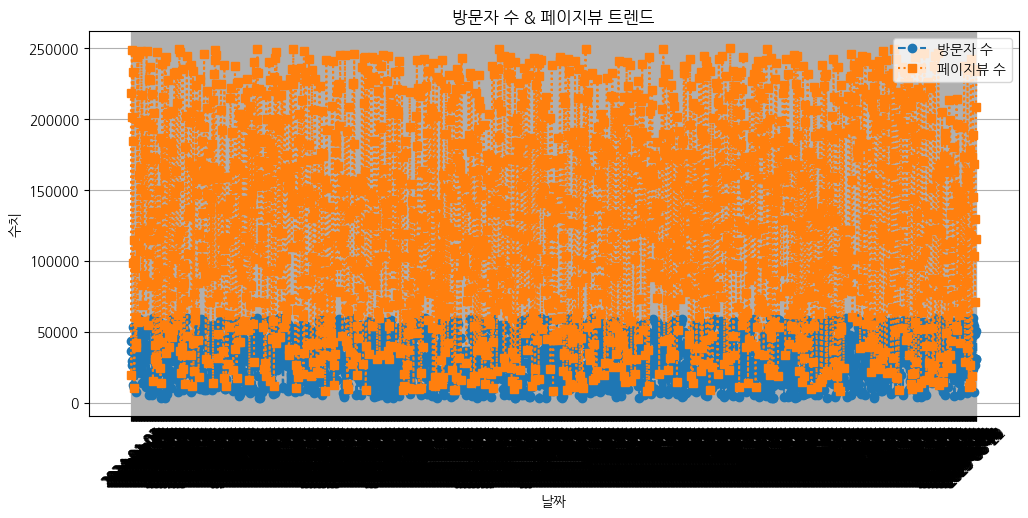

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
plt.figure(figsize=(12, 5))
plt.plot(df["날짜"], df["방문자 수"], label="방문자 수", marker="o", linestyle="dashed")
plt.plot(df["날짜"], df["페이지뷰 수"], label="페이지뷰 수", marker="s", linestyle="dotted")
plt.xlabel("날짜")
plt.ylabel("수치")
plt.title("방문자 수 & 페이지뷰 트렌드")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

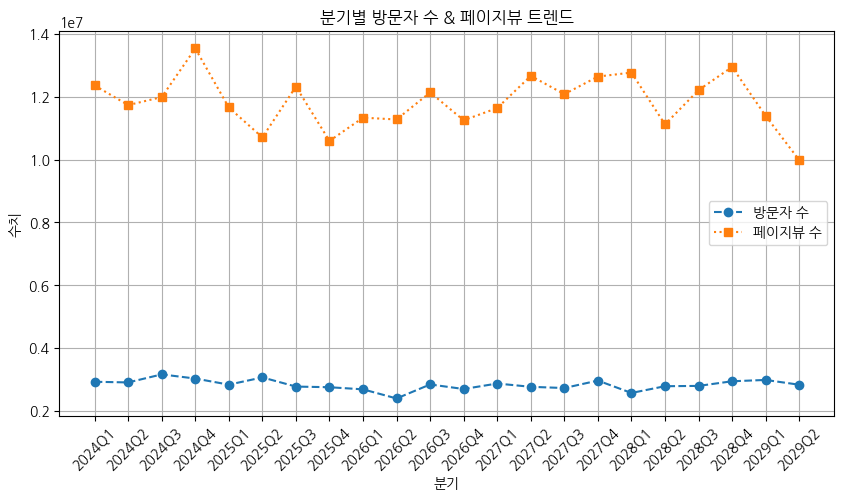

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "lotteon.csv"  # 파일 경로에 맞게 수정하세요.
df = pd.read_csv(file_path)

# 날짜 컬럼을 datetime 형식으로 변환

df["날짜"] = pd.to_datetime(df["날짜"], format="%Y-%m-%d")


# 분기(Quarter) 단위로 변환
df["분기"] = df["날짜"].dt.to_period("Q")

# 분기별 데이터 집계
quarterly_data = df.groupby("분기")[["방문자 수", "페이지뷰 수"]].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(quarterly_data["분기"].astype(str), quarterly_data["방문자 수"], label="방문자 수", marker="o", linestyle="dashed")
plt.plot(quarterly_data["분기"].astype(str), quarterly_data["페이지뷰 수"], label="페이지뷰 수", marker="s", linestyle="dotted")

plt.xlabel("분기")
plt.ylabel("수치")
plt.title("분기별 방문자 수 & 페이지뷰 트렌드")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


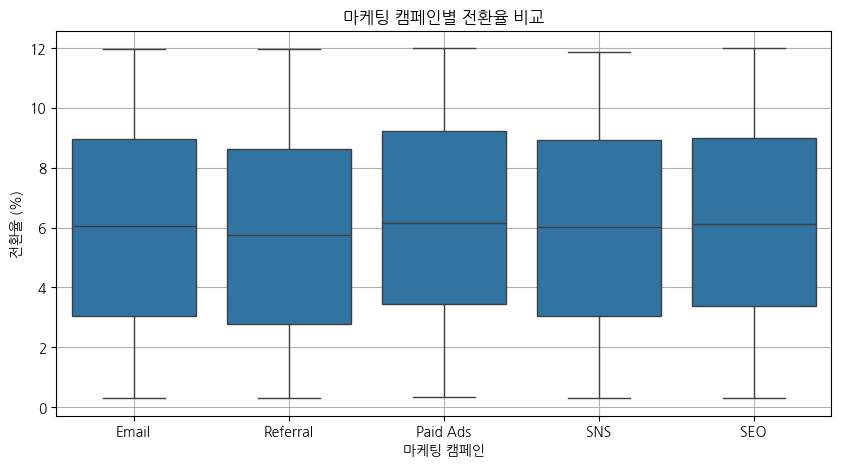

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="마케팅 캠페인", y="전환율 (%)", data=df)
plt.xlabel("마케팅 캠페인")
plt.ylabel("전환율 (%)")
plt.title("마케팅 캠페인별 전환율 비교")
plt.grid()
plt.show()

<ipython-input-7-95718825ddf5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_conversion.index, y=campaign_conversion.values, palette="Blues_r")


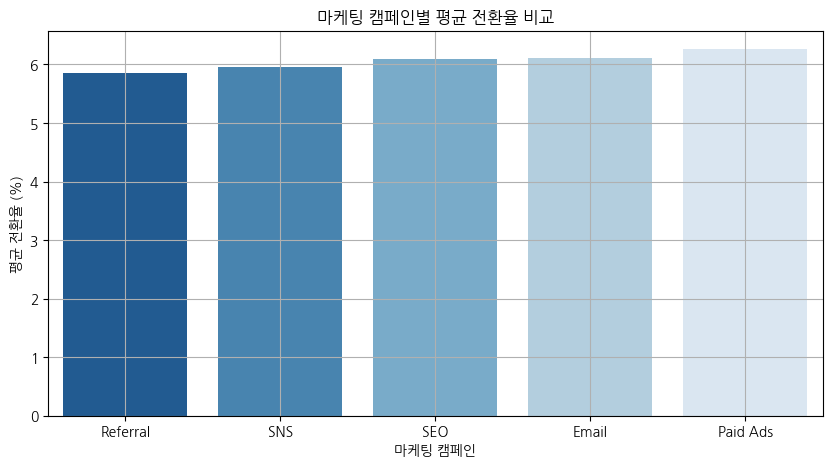

In [ ]:
import seaborn as sns

campaign_conversion = df.groupby("마케팅 캠페인")["전환율 (%)"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_conversion.index, y=campaign_conversion.values, palette="Blues_r")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 전환율 (%)")
plt.title("마케팅 캠페인별 평균 전환율 비교")
plt.grid()
plt.show()

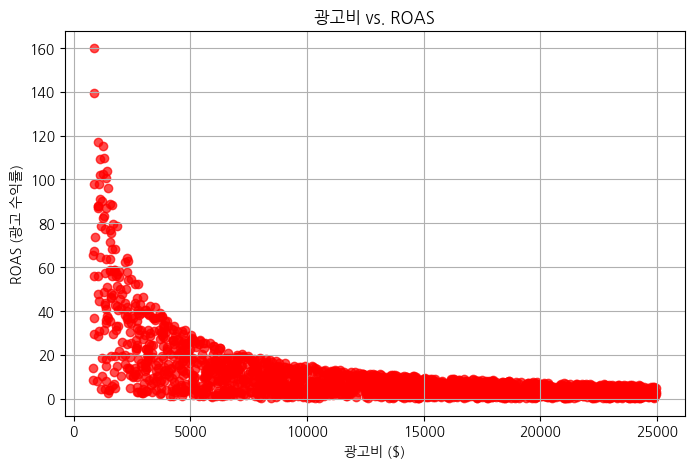

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df["광고비 ($)"], df["광고 수익률 (ROAS)"], color="red", alpha=0.7)
plt.xlabel("광고비 ($)")
plt.ylabel("ROAS (광고 수익률)")
plt.title("광고비 vs. ROAS")
plt.grid()
plt.show()

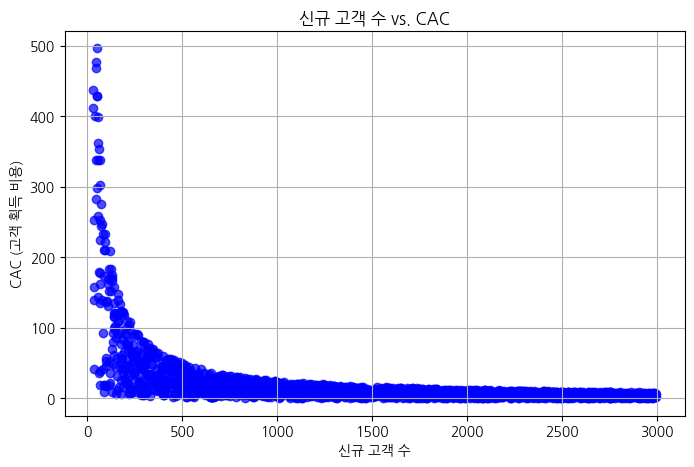

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df["신규 고객 수"], df["고객 획득 비용 (CAC)"], color="blue", alpha=0.7)
plt.xlabel("신규 고객 수")
plt.ylabel("CAC (고객 획득 비용)")
plt.title("신규 고객 수 vs. CAC")
plt.grid()
plt.show()

이탈률과 전환율의 상관계수: 0.01


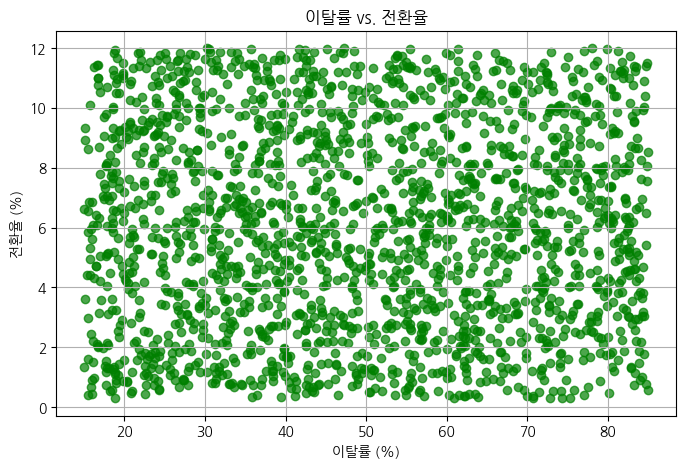

In [ ]:
import numpy as np

correlation = np.corrcoef(df["이탈률 (%)"], df["전환율 (%)"])[0, 1]
print(f"이탈률과 전환율의 상관계수: {correlation:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(df["이탈률 (%)"], df["전환율 (%)"], color="green", alpha=0.7)
plt.xlabel("이탈률 (%)")
plt.ylabel("전환율 (%)")
plt.title("이탈률 vs. 전환율")
plt.grid()
plt.show()

<ipython-input-13-20bae3b9e0df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_ctr.index, y=campaign_ctr.values, palette="Reds_r")


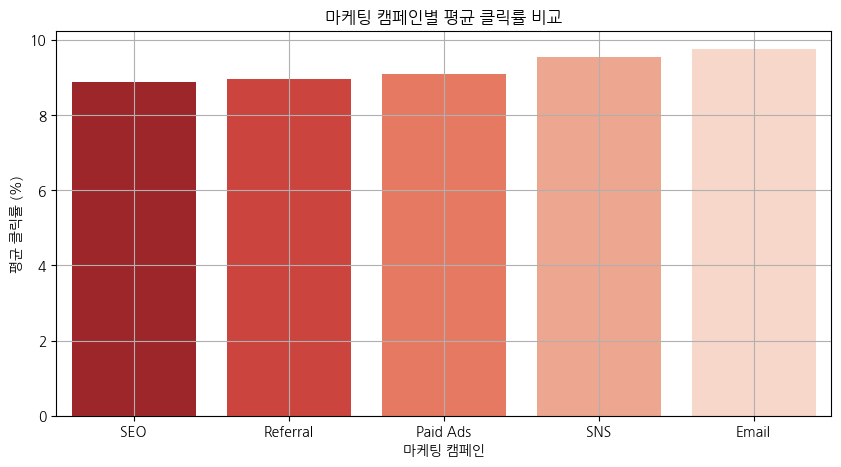

In [ ]:
campaign_ctr = df.groupby("마케팅 캠페인")["클릭률 (%)"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_ctr.index, y=campaign_ctr.values, palette="Reds_r")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 클릭률 (%)")
plt.title("마케팅 캠페인별 평균 클릭률 비교")
plt.grid()
plt.show()

<ipython-input-14-3a4798ab4f9e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_roas.index, y=campaign_roas.values, palette="Purples_r")


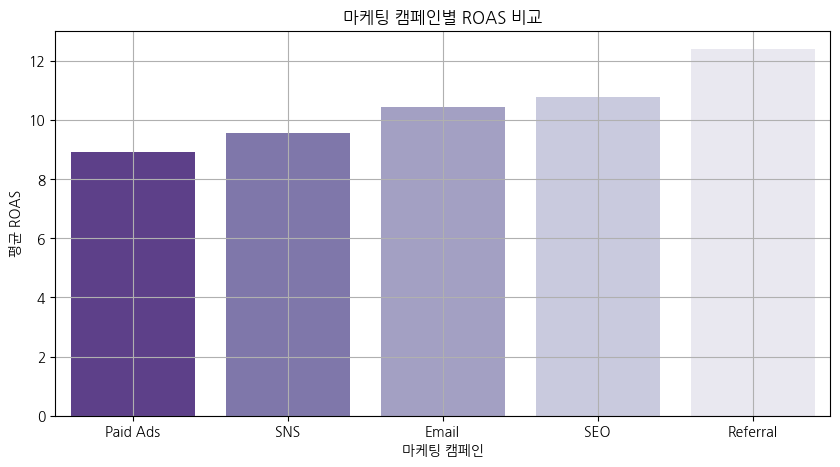

In [ ]:
campaign_roas = df.groupby("마케팅 캠페인")["광고 수익률 (ROAS)"].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_roas.index, y=campaign_roas.values, palette="Purples_r")
plt.xlabel("마케팅 캠페인")
plt.ylabel("평균 ROAS")
plt.title("마케팅 캠페인별 ROAS 비교")
plt.grid()
plt.show()

In [ ]:
high_abandonment = df.sort_values(by="장바구니 이탈율 (%)", ascending=False).head(5)
low_abandonment = df.sort_values(by="장바구니 이탈율 (%)", ascending=True).head(5)

print("장바구니 이탈율 높은 날짜:")
print(high_abandonment[["날짜", "장바구니 이탈율 (%)", "전환율 (%)", "광고비 ($)"]])

print("\n장바구니 이탈율 낮은 날짜:")
print(low_abandonment[["날짜", "장바구니 이탈율 (%)", "전환율 (%)", "광고비 ($)"]])

장바구니 이탈율 높은 날짜:
             날짜  장바구니 이탈율 (%)  전환율 (%)  광고비 ($)
734  2026-01-04         74.92     5.68    23570
86   2024-03-27         74.91     8.71     1227
1311 2027-08-04         74.88    10.92    22153
129  2024-05-09         74.88    11.86    11586
641  2025-10-03         74.87     6.61    18434

장바구니 이탈율 낮은 날짜:
             날짜  장바구니 이탈율 (%)  전환율 (%)  광고비 ($)
209  2024-07-28          5.08     6.17    22614
975  2026-09-02          5.09     0.94    13817
1334 2027-08-27          5.10     8.13    12727
1910 2029-03-25          5.12     1.15    22951
834  2026-04-14          5.13     1.30    20844


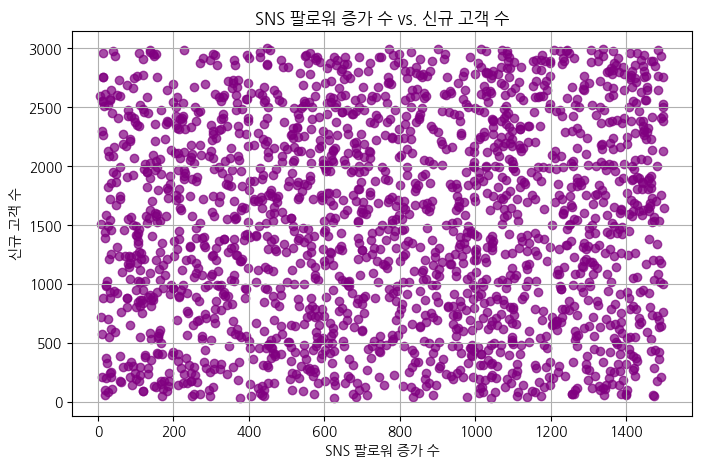

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df["SNS 팔로워 증가 수"], df["신규 고객 수"], color="purple", alpha=0.7)
plt.xlabel("SNS 팔로워 증가 수")
plt.ylabel("신규 고객 수")
plt.title("SNS 팔로워 증가 수 vs. 신규 고객 수")
plt.grid()
plt.show()

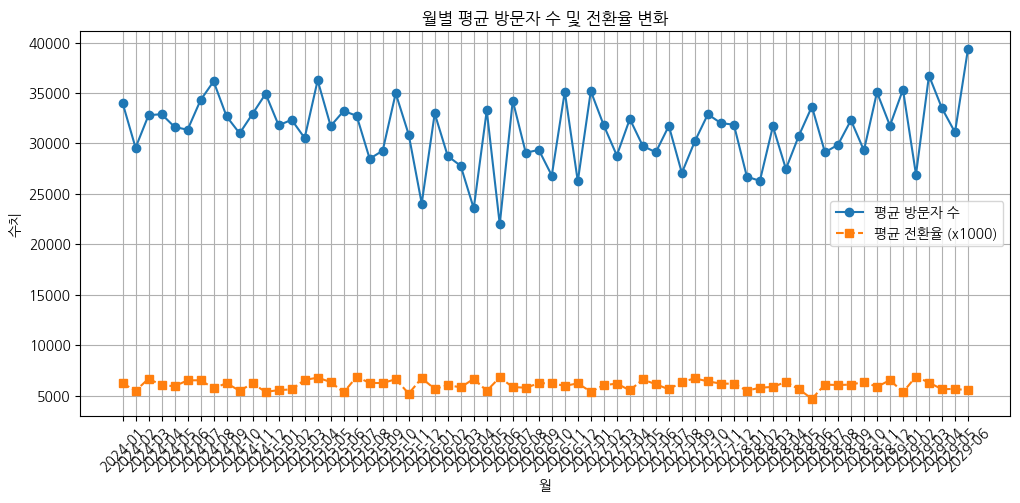

In [ ]:
df["월"] = df["날짜"].dt.to_period("M")

monthly_avg = df.groupby("월")[["방문자 수", "전환율 (%)"]].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index.astype(str), monthly_avg["방문자 수"], label="평균 방문자 수", marker="o")
plt.plot(monthly_avg.index.astype(str), monthly_avg["전환율 (%)"] * 1000, label="평균 전환율 (x1000)", marker="s", linestyle="dashed")
plt.xlabel("월")
plt.ylabel("수치")
plt.title("월별 평균 방문자 수 및 전환율 변화")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()